Creating and plotting Special Fucntions:

In [8]:
import numpy as np
import sympy as sp
from math import factorial as fact
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as poly

### 1) Legendre Functions:
$P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

<b> Rodrigue Formula:</b> <br>
$$ P_{n} = \frac{1}{n! \space 2^n}.\frac{d^n}{dx^n}(x^2 -1)^n $$
where $ P_{0} (x) = 1 , P_{1} (x) = x $

In [9]:
# Only with numerical value
pol = poly([-1,0,1])

def Rodrigue(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        coeff = 1/( 2**n * fact(n) )
        term = pol**n
        derv = term.deriv(n)
        return coeff*derv(x)

x = 2
for i in range(5):
    print(f'P({i},{x}) :', Rodrigue(i, x))


P(0,2) : 1
P(1,2) : 2
P(2,2) : 5.5
P(3,2) : 17.0
P(4,2) : 55.375


In [10]:
x = sp.symbols('x')

# Define the Legendre polynomial using Rodrigues' formula
def Rodrigue(n, x_val):
    if n == 0:
        return 1
    elif n == 1:
        return x_val
    else:
        coeff = 1 / (2**n * sp.factorial(n))
        term = (x**2 - 1)**n
        derv = sp.diff(term, x, n)
        return (coeff * derv.subs(x, x_val)).expand()

# Test with a numerical value
print("Numerical :")
for i in range(5):
    print(f'P({i},{2}) :', Rodrigue(i, 2))

print("\nSymbolic :")
for i in range(5):
    print(f'P({i},{x}) :', Rodrigue(i, x))


Numerical :
P(0,2) : 1
P(1,2) : 2
P(2,2) : 11/2
P(3,2) : 17
P(4,2) : 443/8

Symbolic :
P(0,x) : 1
P(1,x) : x
P(2,x) : 3*x**2/2 - 1/2
P(3,x) : 5*x**3/2 - 3*x/2
P(4,x) : 35*x**4/8 - 15*x**2/4 + 3/8


<b> Series Formula:</b> <br>
$$ P_{n} = \sum_{r=0}^{N} \frac{(-1)^r (2n-2r)!}{2^n r!(n-r)!(n-2r)!}. x^{n-2r} $$
where $ r = \frac{n}{2}  for \space n - even \space and \space r = \frac{n-1}{2} for \space n - odd $

In [11]:
def legendre(n,x):
    N = n//2 if n%2 == 0 else (n-1)//2

    sum = 0
    for r in range(0,N+1,1):
        num = (-1)**r *fact(2*n-2*r)
        denom = (2**n)*fact(r)*fact(n-r)*fact(n-2*r)
        term = num/denom * x**(n-2*r)
        # print(r,num,denom,term)
        sum += term
    return sum

x = 2
for i in range(5):
    print(f'P({i},{x}) :', legendre(i, x))

P(0,2) : 1.0
P(1,2) : 2.0
P(2,2) : 5.5
P(3,2) : 17.0
P(4,2) : 55.375


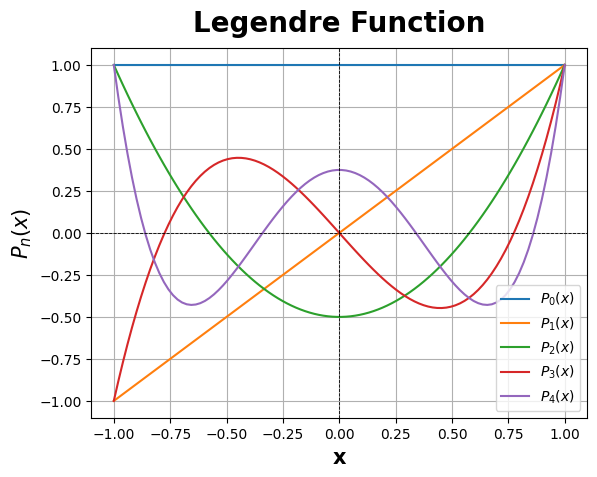

In [12]:
# Plotting Legendre:
N = 4 # highest order polynomial

plt.figure(1)
x = np.linspace(-1,1,100,endpoint=True)
for n in range(0,N+1):
  plt.plot(x,legendre(n,x),label = r'$P_%d (x)$'%(n))

plt.title('Legendre Function',fontdict={'fontsize':20,'fontweight':600},pad=12)
plt.xlabel('x',fontdict={'fontsize':15,'fontweight':'bold'})
plt.ylabel('$P_n(x)$',fontdict={'fontsize':15,'fontweight':'bold'})
plt.axhline(0,color ='black',linestyle = 'dashed',linewidth =0.6)
plt.axvline(0,color ='black',linestyle = 'dashed',linewidth =0.6)
plt.grid()
plt.legend()

plt.show()

### 2) Bessel Function:
$J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

<b> Series Formula for first kind:</b> <br>
$$ J_{n} = \sum_{r=0}^{\infty} \frac{(-1)^r}{r!(n+r)!}. (\frac{x}{2})^{n-2r} $$

In [13]:
def Bessel(n,x):
  sum = 0
  for r in range(0,100,1):
    num = (-1)**r
    denom = fact(n+r)*fact(r)
    term = (num/denom) * ((x/2)**(n+2*r))
    sum += term
  return sum

x = 2
for i in range(5):
  print(f'J({i},{x}) :', Bessel(i, x))

J(0,2) : 0.22389077914123562
J(1,2) : 0.5767248077568736
J(2,2) : 0.35283402861563773
J(3,2) : 0.1289432494744021
J(4,2) : 0.03399571980756843


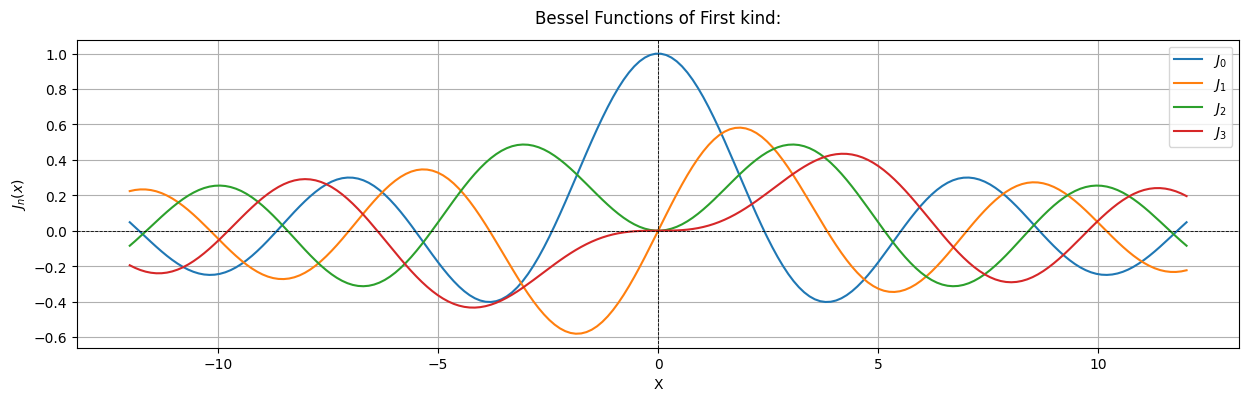

In [14]:
# Plotting Bessels function
fig,ax = plt.subplots(figsize=(15,4))

x = np.linspace(-12,12,200)
for i in range(4):
  ax.plot(x, Bessel(i, x),label = r'$J_%d$'%(i))

ax.set_title('Bessel Functions of First kind:',pad=12)
ax.set_xlabel('X')
ax.set_ylabel('$J_n(x)$')
plt.axhline(0,color ='black',linestyle = 'dashed',linewidth =0.6)
plt.axvline(0,color ='black',linestyle = 'dashed',linewidth =0.6)

ax.legend()
ax.grid()
plt.show()